In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, methods
from coffea import processor
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout, selection
#from sidm.tools import llpnanoaodschema_0726 as llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
importlib.reload(selection)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

ModuleNotFoundError: No module named 'sidm'

In [103]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/knh3dg@virginia.edu/proxy/8787/status,
Comm: tls://192.168.55.164:8786,Workers: 0
Dashboard: /user/knh3dg@virginia.edu/proxy/8787/status,Total threads: 0
Started: 1 hour ago,Total memory: 0 B


In [2]:
samples = [
    #'2Mu2E_500GeV_5p0GeV_0p08mm',
    #'2Mu2E_500GeV_5p0GeV_0p8mm',
    #'2Mu2E_500GeV_5p0GeV_40p0mm',
    #'2Mu2E_500GeV_5p0GeV_80p0mm',
    #'2Mu2E_500GeV_5p0GeV_8p0mm',
    '2Mu2E_800GeV_5p0GeV_50p0mm'
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    #schema=llpnanoaodschema.NanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
)

channels = [
    "baseNoTriggerNoLjNoLjsource",
    "baseNoLjNoLjsource",
    "NoLjNoLjsource2pfmu",
    "baseNoLj",
    "noLj2pfmu",
    "ljsource_test_electrons",
    "ljsource_test_muons",
    "ljsource_test_photons",
    "ljsource_test_dsaMuons",
    "NoLjNoLjsource2dsamu",
    "noLj2dsamu",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["genA_toMu_base"],
    verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in divide
  result = getattr(ufunc, method)(

Applying genMus status 1

Applying genEs status 1

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Applying cut: PV filter

Applying genMus status 1

Applying genEs status 1

Applying cut: PV filter

Applying cut: pass triggers

Applying genMus status 1

Applying genEs status 1

Applying genAs_toMu >= 2 close mu

Applying cut: PV filter

Applying cut: pass triggers

Warning: a histogram with the name genAs_toMu_pt_MuMudR_lowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_highRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_highRange_MuMudR_lowRange could not be filled and will be skipped

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cut: PV filter

Applying cut: pass triggers

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying genAs_toMu >= 2 close mu

Applying cut: PV filter

Applying cut: pass triggers

Warning: a histogram with the name genAs_toMu_pt_MuMudR_lowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_highRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_highRange_MuMudR_lowRange could not be filled and will be skipped

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying genAs_toMu >= 2 close mu

Applying cut: PV filter

Applying cut: pass triggers

Warning: a histogram with the name genAs_toMu_pt_MuMudR_lowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_highRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_highRange_MuMudR_lowRange could not be filled and will be skipped

Applying genMus status 1

Applying genEs status 1

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying genAs_toMu >= 2 close mu

Applying cut: PV filter

Applying cut: pass triggers

Warning: a histogram with the name genAs_toMu_pt_MuMudR_lowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_lxy_MuMudR_XXLowRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_MuMudR_highRange could not be filled and will be skipped

Warning: a histogram with the name genAs_toMu_pt_highRange_MuMudR_lowRange could not be filled and will be skipped

Applying genMus status 1

Applying genEs status 1

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying genAs_toMu >= 2 close mu

KeyboardInterrupt: 

Text(0.5, 1.07, 'Triggers + 2 PF Muons + DSA Muon LJ Source')

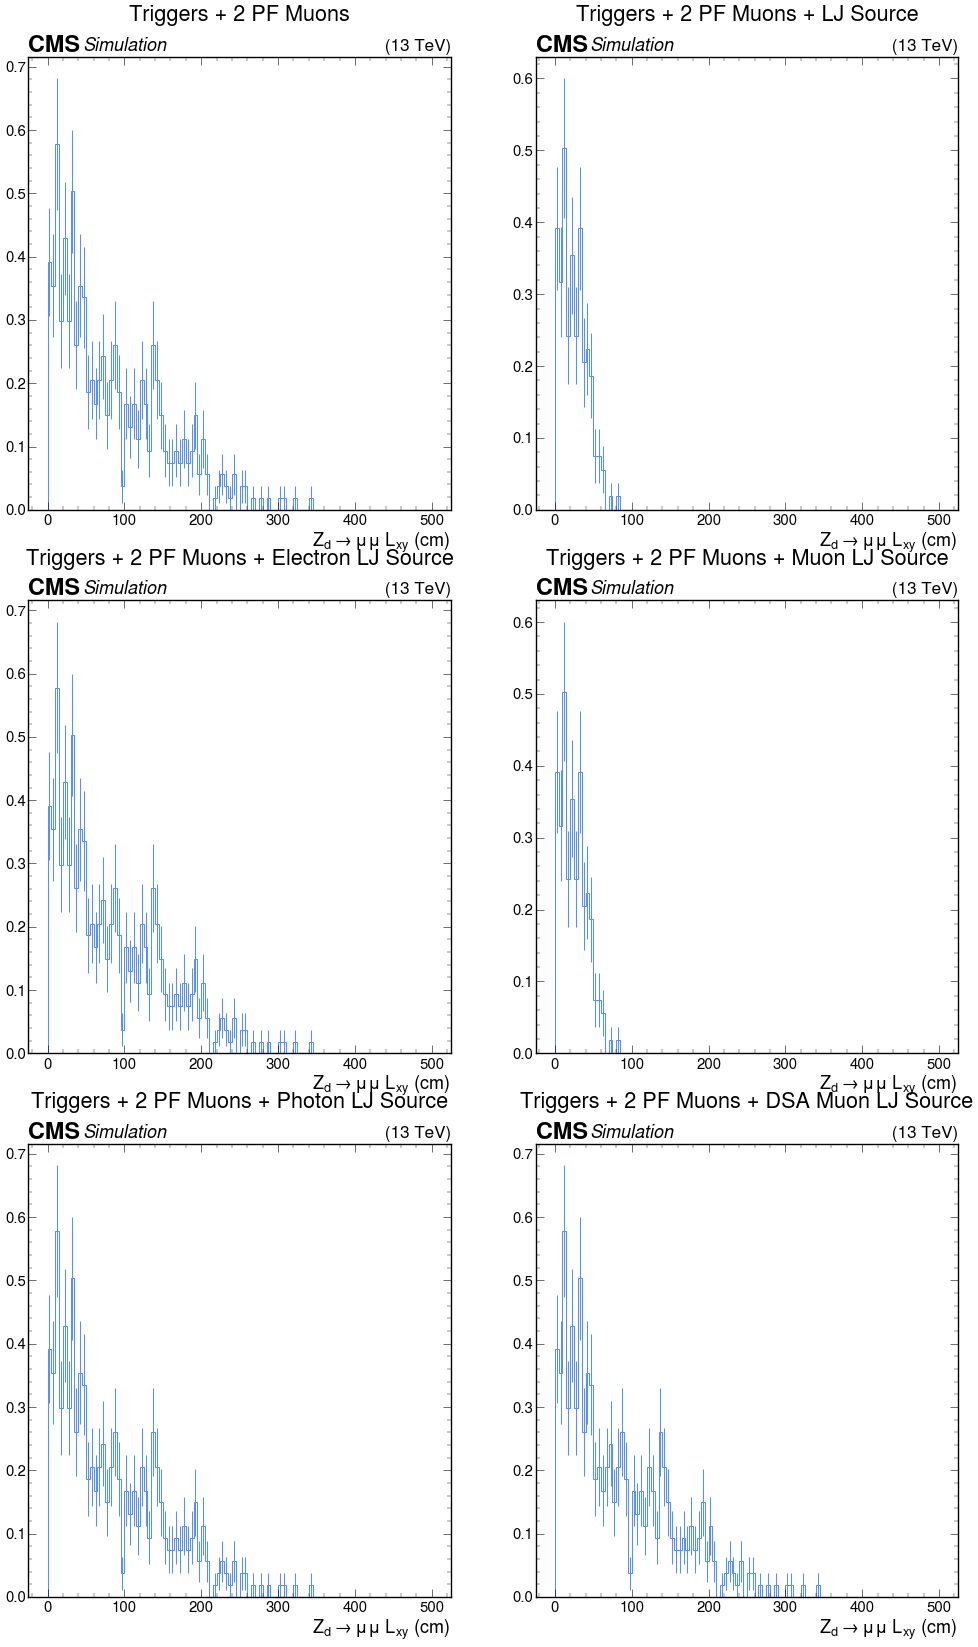

In [11]:
plt.subplots(3, 2, figsize=(24, 40))
plt.subplot(3, 2, 1)
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[2], :])
plt.title("Triggers + 2 PF Muons",y=1.07)
#plt.yscale("log")
plt.subplot(3, 2, 2)
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[4], :])
plt.title("Triggers + 2 PF Muons + LJ Source",y=1.07)
#plt.yscale("log")
plt.subplot(3, 2, 3)
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[5], :])
plt.title("Triggers + 2 PF Muons + Electron LJ Source",y=1.07)
plt.subplot(3, 2, 4)
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[6], :])
plt.title("Triggers + 2 PF Muons + Muon LJ Source",y=1.07)
plt.subplot(3, 2, 5)
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[7], :])
plt.title("Triggers + 2 PF Muons + Photon LJ Source",y=1.07)
plt.subplot(3, 2, 6)
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[8], :])
plt.title("Triggers + 2 PF Muons + DSA Muon LJ Source",y=1.07)

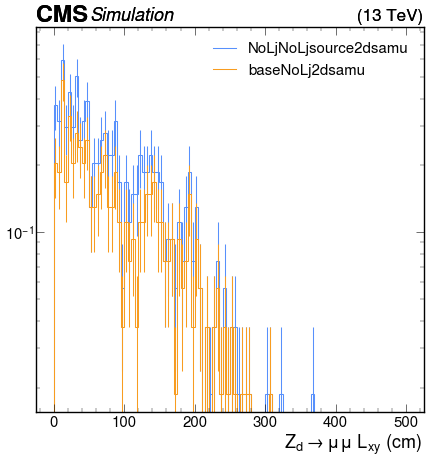

In [8]:
channel1 = 9
channel2 = 10
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel1], :])
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel2], :])
plt.yscale("log")
plt.legend([channels[channel1],channels[channel2]])

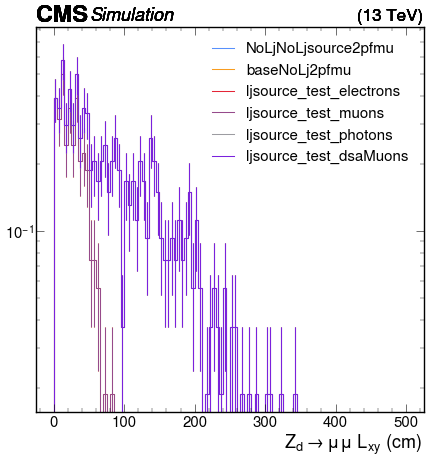

In [14]:
channel1 = 2
channel2 = 4
channel3 = 5
channel4 = 6
channel5 = 7
channel6 = 8
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel1], :])
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel2], :])
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel3], :])
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel4], :])
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel5], :])
utilities.plot(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[channel6], :])
plt.yscale("log")
plt.legend([channels[channel1],channels[channel2],channels[channel3],channels[channel4],channels[channel5],channels[channel6]])

/usr/local/lib/python3.10/site-packages/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


Text(0.5, 3.1, 'Electron Cuts')

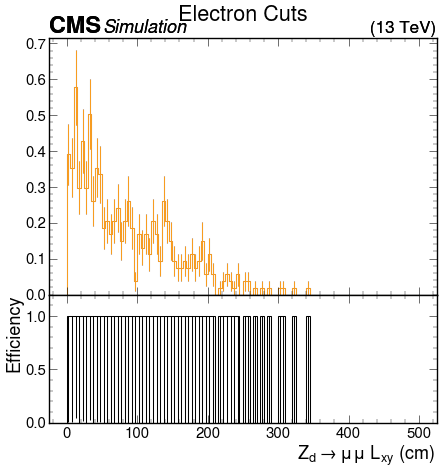

In [19]:
#print(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :]))
#utilities.plot(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :])[0])
utilities.plot_ratio(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[5], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[2], :])
plt.title("Electron Cuts",y=3.1)

/usr/local/lib/python3.10/site-packages/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


Text(0.5, 3.1, 'Muon Cuts')

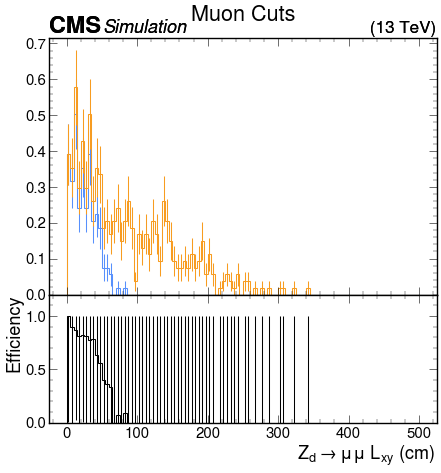

In [20]:
#print(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :]))
#utilities.plot(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :])[0])
utilities.plot_ratio(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[6], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[2], :])
plt.title("Muon Cuts",y=3.1)

/usr/local/lib/python3.10/site-packages/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


Text(0.5, 3.1, 'Photon Cuts')

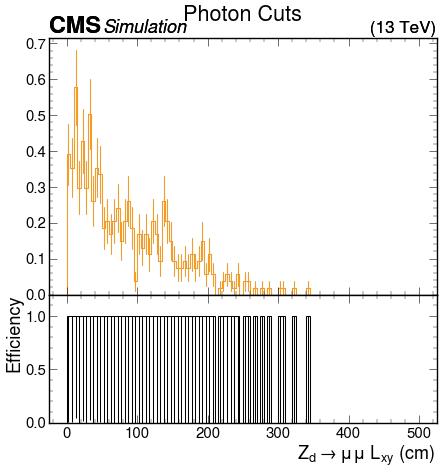

In [21]:
#print(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :]))
#utilities.plot(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :])[0])
utilities.plot_ratio(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[7], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[2], :])
plt.title("Photon Cuts",y=3.1)

/usr/local/lib/python3.10/site-packages/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


Text(0.5, 3.1, 'DSA Muon Cuts')

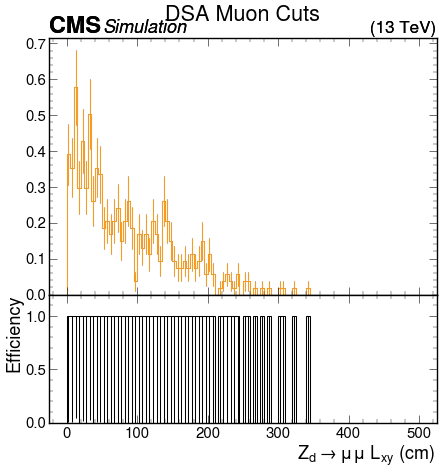

In [22]:
#print(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :]))
#utilities.plot(utilities.get_eff_hist(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[1], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[0], :])[0])
utilities.plot_ratio(out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[8], :],out[samples[0]]["hists"]["genAs_toMu_lxy"][channels[2], :])
plt.title("DSA Muon Cuts",y=3.1)

In [3]:
samples = [
    '2Mu2E_800GeV_5p0GeV_50p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")
file_path = 'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_v3_part-0.root'

events = NanoEventsFactory.from_root(
    file_path,
    treepath='Events',
    schemaclass=NanoAODSchema,
).events()

events

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


<NanoEventsArray [<event 1:1:1>, ... <event 1:2:300>] type='2812 * event'>

In [6]:
obj1 = events.Muon
obj2 = (events.GenPart[events.GenPart.pdgId == 13])
obj3 = events.GenJet

for i in obj3[0]:
    print(i)

#my_array = obj1.metric_table(obj2)
#my_array = my_array[my_array < 0.04]
#count_array = ak.count(my_array,axis=1)
#final = obj1[count_array >= 2]
#plt.hist(ak.flatten(utilities.rho(obj1)),alpha=0.5,range=(0,500),bins=30,label="All Pf Muons")
#plt.hist(ak.flatten(utilities.rho(final)),alpha=0.5,range=(0,500),bins=30,label=">= 2 Pf Muons near Dark Photons")
#plt.xlabel("distance")
#plt.legend()

... mass: 8.74, phi: -0.635, pt: 240, partonFlavour: 0, hadronFlavour: 0}
{eta: -1.31, mass: 22, phi: 2.6, pt: 236, partonFlavour: 21, hadronFlavour: 0}
... mass: 6.8, phi: -0.636, pt: 17.2, partonFlavour: 21, hadronFlavour: 0}
... eta: -1.97, mass: 2.64, phi: 2.22, pt: 14, partonFlavour: 21, hadronFlavour: 0}
... mass: 3.05, phi: 0.485, pt: 10.9, partonFlavour: 21, hadronFlavour: 0}


In [17]:
my_array = utilities.numClose(obj2,obj1,0.04)
table = obj1.metric_table(obj2)
#count_array = ak.where(ak.num(count_array) == 0, 0, count_array)
#print(count_array)
for j in range(100):
    print(my_array[j])
    print(utilities.dR(obj2,obj1)[j])
    print(obj2[j])
    print(obj1[j])
    print(table[j])
    print("\n")

[1]
[0.00808]
[GenParticle]
[Muon, Muon]
[[0.00808], [0.0487]]


[1]
[0.00088]
[GenParticle]
[Muon, Muon]
[[0.00088], [0.0756]]


[1, 1]
[0.00494, 0.00494]
[GenParticle, GenParticle]
[Muon]
[[0.00494, 0.00494]]


[]
[inf]
[GenParticle]
[]
[]


[]
[0.183]
[GenParticle]
[Muon]
[[0.183]]


[1, 1]
[0.0188, 0.0188]
[GenParticle, GenParticle]
[Muon, Muon]
[[0.0188, 0.0188], [0.0671, 0.0671]]


[]
[0.0504, 2.59]
[GenParticle, GenParticle]
[Muon, Muon, Muon]
[[0.063, 2.61], [0.0504, 2.59], [2.45, 2.83]]


[]
[0.0863]
[GenParticle]
[Muon, Muon]
[[0.0863], [1.42]]


[]
[0.0568, 0.0568]
[GenParticle, GenParticle]
[Muon, Muon]
[[0.0568, 0.0568], [0.0671, 0.0671]]


[1]
[0.000244]
[GenParticle]
[Muon, Muon]
[[0.000244], [0.068]]


[2]
[0.02]
[GenParticle]
[Muon, Muon]
[[0.0216], [0.02]]


[2]
[0.0313]
[GenParticle]
[Muon, Muon, Muon]
[[0.0313], [0.0373], [2.74]]


[1]
[0.0381]
[GenParticle]
[Muon, Muon]
[[0.0381], [0.0587]]


[1]
[0.0354]
[GenParticle]
[Muon]
[[0.0354]]


[]
[0.185, 0.184]
[GenPart